In [0]:
#--Description:This program aims at using the Artificial Neural Networks: Recurrent Neural Network and Long Short Term
#              Memory (LSTM) to predict future closing prices of the Brent Oil Commodity using previous stock price from
#              105 months (Dec 2, 2010 to Sept 2, 2019) .

In [0]:
#-------IMPORT LIBRARIES--------

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [0]:
#------------IMPORT THE DATAFRAME-----------

In [5]:
df = pd.read_csv('BRENToil.csv')
df.head()

,Gmt time,Open,High,Low,Close,Volume
0,01.12.2010 22:00:00.000,88.734,90.810,88.390,90.680,10575.0840
1,02.12.2010 22:00:00.000,90.690,91.838,90.086,91.565,18357.7109
2,05.12.2010 22:00:00.000,91.578,91.999,90.836,90.968,22625.6281
3,06.12.2010 22:00:00.000,90.975,92.840,90.695,90.868,15015.8009
4,07.12.2010 22:00:00.000,90.858,91.708,90.128,90.991,17948.3942


In [6]:
df.shape

(2212, 6)

In [0]:
#-----------DISPLAY DATA TYPES---------

In [8]:
df.dtypes

Gmt time     object
Open        float64
High        float64
Low         float64
Close       float64
Volume      float64
dtype: object

In [0]:
#----------CONVERT 'GMT TIME' TO DATETIME DATA TYPE---------

In [10]:
df['Gmt time']=pd.to_datetime(df['Gmt time'])
df.dtypes

Gmt time    datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume             float64
dtype: object

In [0]:
#------------CLOSING PRICE VISUALIZATION-------------

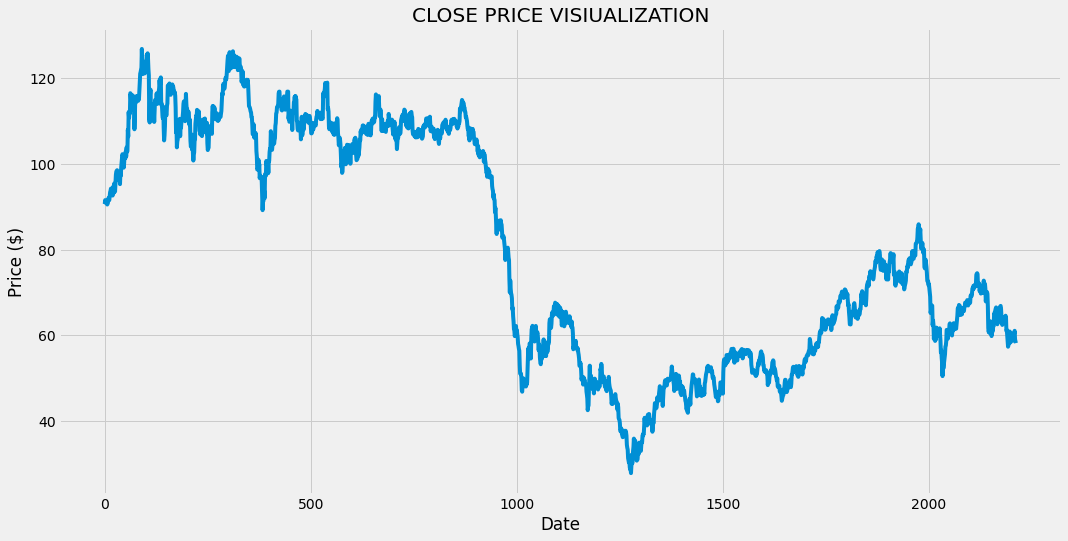

In [12]:
plt.figure(figsize=(16,8))
plt.title('CLOSE PRICE VISIUALIZATION')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.show()

In [13]:
c_df = df.filter(['Close'])
data = c_df.values
train_c_df_len = math.ceil(len(data)*.8)
train_c_df_len

1770

In [14]:
norm = MinMaxScaler(feature_range=(0,1))
norm_data = norm.fit_transform(data)
norm_data

array([[0.63464548],
       [0.64358045],
       [0.63755313],
       ...,
       [0.31515714],
       [0.31051298],
       [0.30647457]])

In [0]:
train_df = norm_data[0:train_c_df_len,:]

In [0]:
x_train = []
y_train = []

for i in range(60, len(train_df)):
    x_train.append(train_df[i-60:i, 0])
    y_train.append(train_df[i,0])

In [0]:
x_train, y_train= np.array(x_train), np.array(y_train)

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1710, 60, 1)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(60, 1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False,))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

In [0]:
#-------------COMPILE MODEL

In [0]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [0]:
#-------------TRAIN MODEL

In [23]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1710/1710 [==============================] - 48s 28ms/step - loss: 0.0032


In [0]:
#----------CREATE TESTING DATA
#----------ARRAY CONTAINING NORMALIZED VALUES FROM 1710 TO 1770

In [0]:
test_df = norm_data[train_c_df_len - 60:, :]

In [26]:
test_df

array([[0.29223919],
       [0.31616675],
       [0.31010914],
       [0.30107321],
       [0.29885208],
       [0.29143151],
       [0.28502055],
       [0.2813355 ],
       [0.28189078],
       [0.29410696],
       [0.2798211 ],
       [0.28093166],
       [0.28961423],
       [0.29072479],
       [0.28835223],
       [0.29617664],
       [0.30344577],
       [0.30561641],
       [0.30642409],
       [0.29688336],
       [0.30294097],
       [0.29769104],
       [0.30925098],
       [0.30874618],
       [0.31959939],
       [0.32974588],
       [0.33403669],
       [0.33560157],
       [0.32939252],
       [0.33206797],
       [0.34554614],
       [0.36563721],
       [0.36043776],
       [0.35988248],
       [0.36301225],
       [0.36089208],
       [0.356046  ],
       [0.33863037],
       [0.34352694],
       [0.33847893],
       [0.35195711],
       [0.34660623],
       [0.35180567],
       [0.35801472],
       [0.3590748 ],
       [0.36230553],
       [0.36230553],
       [0.358

In [0]:
#-------------CREATE X-TEST Y-TEST

In [0]:
x_test = []
y_test = data[train_c_df_len:, :]
for i in range (60, len(test_df)):
  x_test.append(test_df[i-60:i, 0])

In [0]:
#-----------CONVERT TO NP ARRAY
x_test = np.array(x_test)

In [0]:
#---------------RESHAPE THE DATA
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1] , 1))

In [31]:
x_test

array([[[0.29223919],
        [0.31616675],
        [0.31010914],
        ...,
        [0.36346657],
        [0.35155327],
        [0.35887288]],

       [[0.31616675],
        [0.31010914],
        [0.30107321],
        ...,
        [0.35155327],
        [0.35887288],
        [0.35740896]],

       [[0.31010914],
        [0.30107321],
        [0.29885208],
        ...,
        [0.35887288],
        [0.35740896],
        [0.35927672]],

       ...,

       [[0.35786328],
        [0.34857495],
        [0.3456471 ],
        ...,
        [0.32595988],
        [0.3291906 ],
        [0.33545013]],

       [[0.34857495],
        [0.3456471 ],
        [0.32303203],
        ...,
        [0.3291906 ],
        [0.33545013],
        [0.31515714]],

       [[0.3456471 ],
        [0.32303203],
        [0.33787317],
        ...,
        [0.33545013],
        [0.31515714],
        [0.31051298]]])

In [0]:
#------------GET THE MODELS PREDICTED PRICE VALUE

In [0]:
predictions = model.predict(x_test)
predictions = norm.inverse_transform(predictions)

In [0]:
#---------GET ROOT MEAN SQUARED ERROR

In [35]:
rmse =  np.sqrt(np.mean(predictions - y_test**2))
rmse

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


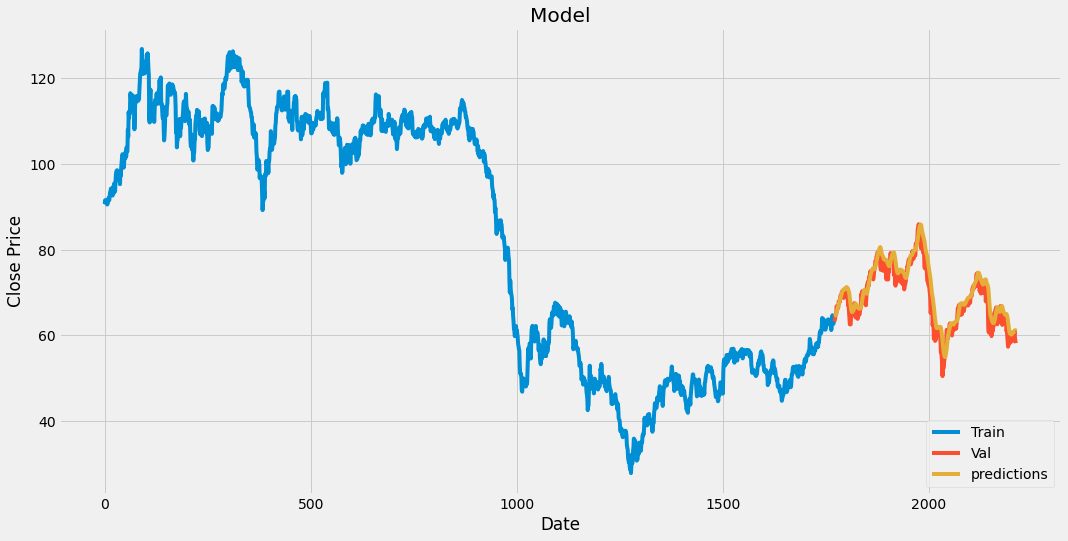

In [36]:
#plot the data
train = c_df[:train_c_df_len]
valid = c_df[train_c_df_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()

In [37]:
#show the valid predicted prices
valid

,Close,Predictions
1770,63.220,64.464577
1771,63.405,64.517395
1772,63.810,64.569130
1773,64.480,64.656647
1774,64.725,64.823990
...,...,...
2207,60.425,60.850471
2208,61.045,60.962955
2209,59.035,61.166225
2210,58.575,61.191177


In [0]:
quote= pd.read_csv('BRENToil.csv')

In [0]:
new_df = quote.filter(['Close'])

In [40]:
new_df

,Close
0,90.680
1,91.565
2,90.968
3,90.868
4,90.991
...,...
2207,60.425
2208,61.045
2209,59.035
2210,58.575


In [0]:
last_100_days = new_df[-100:].values

In [42]:
last_100_days

array([[71.835],
       [71.585],
       [71.925],
       [74.095],
       [74.375],
       [74.495],
       [74.265],
       [71.565],
       [71.945],
       [71.625],
       [72.105],
       [70.325],
       [70.775],
       [71.345],
       [69.745],
       [70.205],
       [70.195],
       [70.725],
       [69.895],
       [70.845],
       [71.885],
       [72.765],
       [72.065],
       [72.045],
       [71.995],
       [70.795],
       [67.915],
       [69.195],
       [69.985],
       [70.085],
       [69.65 ],
       [66.66 ],
       [61.665],
       [60.775],
       [61.425],
       [60.545],
       [62.265],
       [63.265],
       [62.345],
       [62.055],
       [59.815],
       [61.285],
       [62.025],
       [60.955],
       [62.225],
       [62.195],
       [64.505],
       [65.265],
       [64.745],
       [65.785],
       [66.205],
       [66.505],
       [64.385],
       [65.185],
       [62.575],
       [63.865],
       [63.145],
       [64.395],
       [63.915

In [43]:
last_100_days_norm = norm.transform(last_100_days)
X_test = []
X_test.append(last_100_days_norm)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = norm.inverse_transform(pred_price)
print(pred_price)

[[60.841293]]
